,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil
...,...,...,...,...,...
645670,2013-05-01,21.634,0.578,Zhejiang,China
645671,2013-06-01,24.679,0.596,Zhejiang,China
645672,2013-07-01,29.272,1.340,Zhejiang,China
645673,2013-08-01,29.202,0.869,Zhejiang,China


,dt,AverageTemperature,State
0,1855-05-01,25.544,Acre
1,1855-06-01,24.228,Acre
2,1855-07-01,24.371,Acre
3,1855-08-01,25.427,Acre
4,1855-09-01,25.675,Acre
...,...,...,...
645670,2013-05-01,21.634,Zhejiang
645671,2013-06-01,24.679,Zhejiang
645672,2013-07-01,29.272,Zhejiang
645673,2013-08-01,29.202,Zhejiang


,dt,AverageTemperature,State
1748,2001-01-01,25.743,Acre
1749,2001-02-01,26.087,Acre
1750,2001-03-01,26.139,Acre
1751,2001-04-01,26.366,Acre
1752,2001-05-01,25.660,Acre
...,...,...,...
645670,2013-05-01,21.634,Zhejiang
645671,2013-06-01,24.679,Zhejiang
645672,2013-07-01,29.272,Zhejiang
645673,2013-08-01,29.202,Zhejiang


,dt,AverageTemperature,State
626287,2001-01-01,-5.805,Wyoming
626288,2001-02-01,-6.440,Wyoming
626289,2001-03-01,0.526,Wyoming
626290,2001-04-01,5.130,Wyoming
626291,2001-05-01,10.992,Wyoming
...,...,...,...
527354,2013-05-01,13.795,South Dakota
527355,2013-06-01,19.085,South Dakota
527356,2013-07-01,22.649,South Dakota
527357,2013-08-01,22.501,South Dakota


dt
2001-01-01    -4.480333
2001-02-01    -7.541000
2001-03-01     0.590333
2001-04-01     7.889000
2001-05-01    13.908667
                ...    
2013-05-01    13.196000
2013-06-01    18.783667
2013-07-01    22.110333
2013-08-01    21.890000
2013-09-01    18.953000
Name: AverageTemperature, Length: 153, dtype: float64

,dt,AverageTemperature
0,2001-01-01,-4.480333
1,2001-02-01,-7.541000
2,2001-03-01,0.590333
3,2001-04-01,7.889000
4,2001-05-01,13.908667
...,...,...
148,2013-05-01,13.196000
149,2013-06-01,18.783667
150,2013-07-01,22.110333
151,2013-08-01,21.890000


,dt,AverageTemperature,Xdata
0,2001-01-01,-4.480333,1
1,2001-02-01,-7.541000,2
2,2001-03-01,0.590333,3
3,2001-04-01,7.889000,4
4,2001-05-01,13.908667,5
...,...,...,...
148,2013-05-01,13.196000,149
149,2013-06-01,18.783667,150
150,2013-07-01,22.110333,151
151,2013-08-01,21.890000,152



Average Temperature equation parameters and their errors:
a = 13.88353 +/- 0.22599
b = 0.52359 +/- 0.00037
c = -2.16250 +/- 0.03319
d = 8.12782 +/- 0.16050

The final equation for Average Temperature:
13.88353 sin(0.52359 x -2.16250) + 8.12782


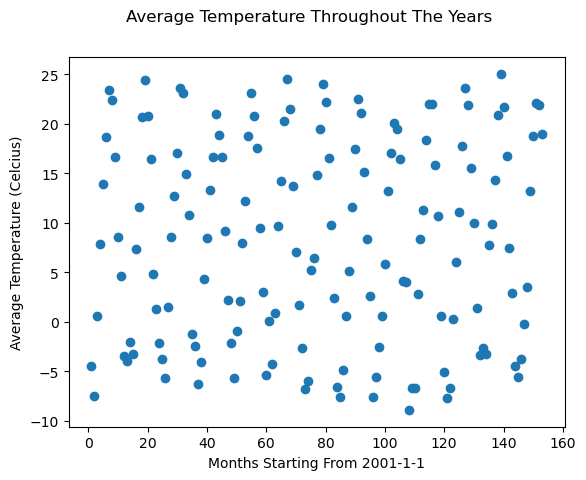

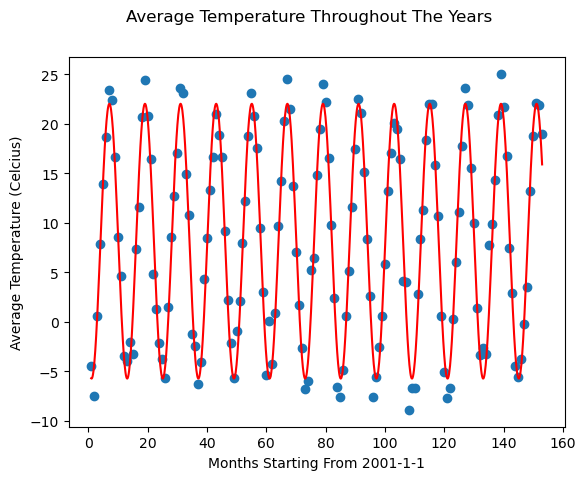

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as fit

LandTemp = pd.read_csv("/Users/joshuawong/Desktop/GlobalLandTemperaturesByState.csv")
display(LandTemp)

LandTemp = LandTemp[["dt", "AverageTemperature", "State"]]
display(LandTemp)

LandTemp["dt"] = pd.to_datetime(LandTemp["dt"], format = "%Y-%m-%d")

LandTemp = LandTemp.loc[LandTemp["dt"] > "2000-12-01"]
display(LandTemp)

LandTemp1 = LandTemp.loc[LandTemp["State"] == "Wyoming"]
LandTemp2 = LandTemp.loc[LandTemp["State"] == "Nebraska"]
LandTemp3 = LandTemp.loc[LandTemp["State"] == "South Dakota"]

combo = [LandTemp1,LandTemp2,LandTemp3]
UltimateLandTemp = pd.concat(combo)
display(UltimateLandTemp)

UltimateLandTemp = UltimateLandTemp.groupby("dt")["AverageTemperature"].mean()
display(UltimateLandTemp)

UltimateLandTemp = UltimateLandTemp.to_frame()
UltimateLandTemp = UltimateLandTemp.reset_index()
display(UltimateLandTemp)


xdata = np.arange(1,154)

fig, ax = plt.subplots()
ax.scatter(xdata,UltimateLandTemp["AverageTemperature"])
fig.suptitle("Average Temperature Throughout The Years")
ax.set_xlabel("Months Starting From 2001-1-1")
ax.set_ylabel("Average Temperature (Celcius)")

xdata = np.arange(1,154)
UltimateLandTemp = UltimateLandTemp.assign(Xdata = xdata)
display(UltimateLandTemp)

def sin(x, a, b, c, d):
    return a * np.sin(b * x + c) + d

p = [5,0.5,1,1]
p1, cov1 = fit.curve_fit(sin, UltimateLandTemp["Xdata"], UltimateLandTemp["AverageTemperature"], p)

fig, ax = plt.subplots()
ax.scatter(xdata,UltimateLandTemp["AverageTemperature"])
x = np.linspace(1,153,1000)
ax.plot(x, sin(x, p1[0], p1[1], p1[2], p1[3]), c='r')
fig.suptitle("Average Temperature Throughout The Years")
ax.set_xlabel("Months Starting From 2001-1-1")
ax.set_ylabel("Average Temperature (Celcius)")

P_errors = []
for i in range(len(cov1)):
    P_errors.append(cov1[i][i] ** 0.5)
    
print('\nAverage Temperature equation parameters and their errors:')
print('a = {0:1.5f} +/- {1:1.5f}'.format(p1[0], P_errors[0]))
print('b = {0:1.5f} +/- {1:1.5f}'.format(p1[1], P_errors[1]))
print('c = {0:1.5f} +/- {1:1.5f}'.format(p1[2], P_errors[2]))
print('d = {0:1.5f} +/- {1:1.5f}'.format(p1[3], P_errors[3]))

print('\nThe final equation for Average Temperature:')
print('{0:1.5f} sin({1:1.5f} x {2:1.5f}) + {3:1.5f}'.format(p1[0], p1[1], p1[2], p1[3]))